In [26]:
import matplotlib.pyplot as plt
import pandas as pd
import csv
from IPython.display import HTML, display

In [4]:
dc = pd.read_csv("Dartmouth_Columbia_Cleaned.csv")

In [ ]:
# What other interesting trends can you find?

In [ ]:
# Academic Year of Players

Text(0.5, 1.0, 'Academic Year Frequencies for Columbia and Dartmouth Football (2010-2023)')

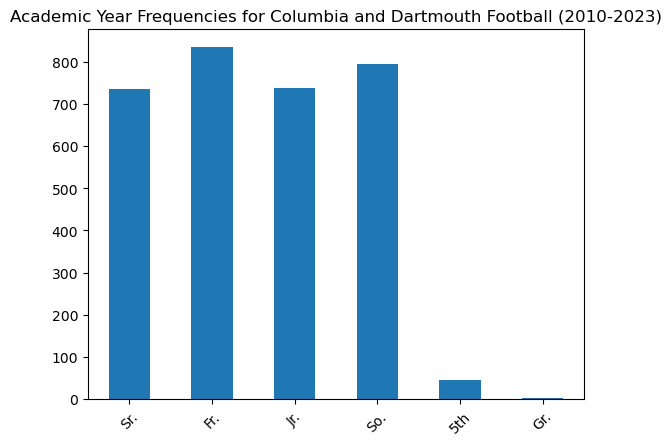

In [94]:
#For both Columbia and Dartmouth, the majority of football players come from the freshman class, which may 
# be related to college admissions. Further analysis of positions they play and the year are revealed below.
football = dc[dc["Sport"] == "football"]["Academic"]

yr_f_dict = {}
for yr in football:
    if yr not in yr_f_dict:
        yr_f_dict[yr] = 1
        
    else:
        yr_f_dict[yr] += 1

pd.Series(yr_f_dict).plot.bar(rot = 45)
plt.title("Academic Year Frequencies for Columbia and Dartmouth Football (2010-2023)")


<AxesSubplot:title={'center':'Columbia Football Academic Year Frequency (2010-2023)'}>

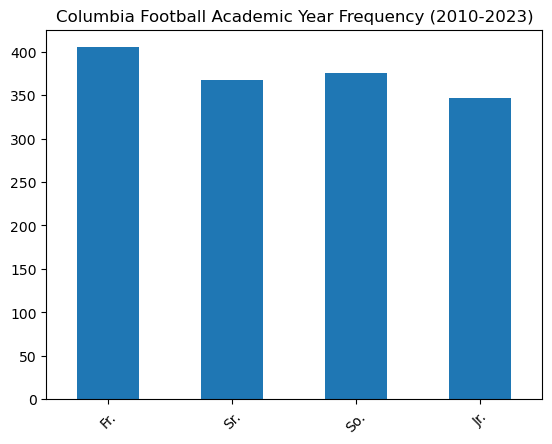

In [136]:
#Columbia Academic Year: This bar graph displays the grade frequency for players on the football team 
#for Columbia. Since 2010, the freshman class accounts for the majority of the football team
f = dc[dc["Sport"] == "football"]
c_f_yr = f[f["College"] == "Columbia"]["Academic"]

columbia_f_grade = {}

for c in c_f_yr:
    if c not in columbia_f_grade:
        columbia_f_grade[c] = 1
    else:
        columbia_f_grade[c] += 1

pd.Series(columbia_f_grade).plot.bar(title = "Columbia Football Academic Year Frequency (2010-2023)", rot = 45)





In [192]:
# Examining the Freshmen class for Columbia Football 2010-2013, the positions played may reveal insight into
# college admissions, or at least pose a future direction to look into.
c_f = f[f["College"] == "Columbia"][["Academic", "Position", "Year"]]
c_fr = c_f[c_f["Academic"] == "Fr."]

#Across all years, what is the most played position?
max(list(c_fr["Position"].value_counts()))

p_d = dict(c_fr["Position"].value_counts())

the_val = 69
the_key = None
for key, value in p_d.items():
    if value == the_val:
        the_key = key
        break
the_key


#Offensive Linebacker is the most played position by freshmen football members

'OL'

In [211]:
#How many Offensize Linebackers were admitted for each year from 2010-2023 Columbia?
ff = dict(c_fr[c_fr["Position"] == "OL"].value_counts())

ol_year = {}
for u in ff:
    ol_year[u[2]] = ff[u]

ordered_ol = dict(sorted(ol_year.items()))
ordered_ol

{2010: 3,
 2011: 5,
 2012: 5,
 2013: 4,
 2014: 7,
 2015: 4,
 2016: 6,
 2017: 5,
 2018: 6,
 2019: 4,
 2020: 4,
 2021: 6,
 2022: 5,
 2023: 5}

<AxesSubplot:title={'center':'Dartmouth Football Academic Year Frequency (2010-2023)'}>

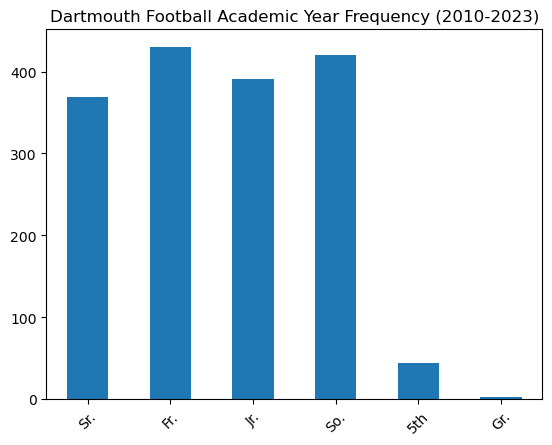

In [134]:
#Dartmouth Academic Year: This bar graph displays the grade frequency for players on the football team 
#for Columbia. Since 2010, the freshman class accounts for the majority of the football team.
f2 = dc[dc["Sport"] == "football"]
d_f_yr = f2[f2["College"] == "Dartmouth"]["Academic"]

dartmouth_f_grade = {}

for d in d_f_yr:
    if d not in dartmouth_f_grade:
        dartmouth_f_grade[d] = 1
    else:
        dartmouth_f_grade[d] += 1
        
pd.Series(dartmouth_f_grade).plot.bar(title = "Dartmouth Football Academic Year Frequency (2010-2023)", rot = 45)

In [222]:
# Similar to Columbia, most the academic year with the highest football player contribution is the 
# freshman class

# So what is the most played position for Dartmouth freshmen football Players?
d_f = f[f["College"] == "Dartmouth"][["Academic", "Position", "Year"]]
d_fr = d_f[d_f["Academic"] == "Fr."]

#Across all years, what is the most played position?
max(list(d_fr["Position"].value_counts()))

pd_d = dict(d_fr["Position"].value_counts())

the_val = 70
the_key = None
for key, value in pd_d.items():
    if value == the_val:
        the_key = key
        break
the_key

# It is also Offensive Linebacker

'OL'

In [234]:
#How many Offensize Linebackers were admitted for each year from 2010-2023 Dartmouth?
ffd = dict(d_fr[d_fr["Position"] == "OL"].value_counts())

old_year = {}
for u in ffd:
    old_year[u[2]] = ffd[u]

ordered_ol = dict(sorted(old_year.items()))
ordered_ol

{2010: 5,
 2011: 6,
 2012: 5,
 2013: 5,
 2014: 3,
 2015: 6,
 2016: 5,
 2017: 5,
 2018: 4,
 2019: 5,
 2020: 5,
 2021: 6,
 2022: 4,
 2023: 6}

In [ ]:
# The most frequently admitted position for Dartmouth and Columbia Football was Offensive Linebacker

Text(0.5, 1.0, 'Dartmouth Football Weight Frequency 2010-2023')

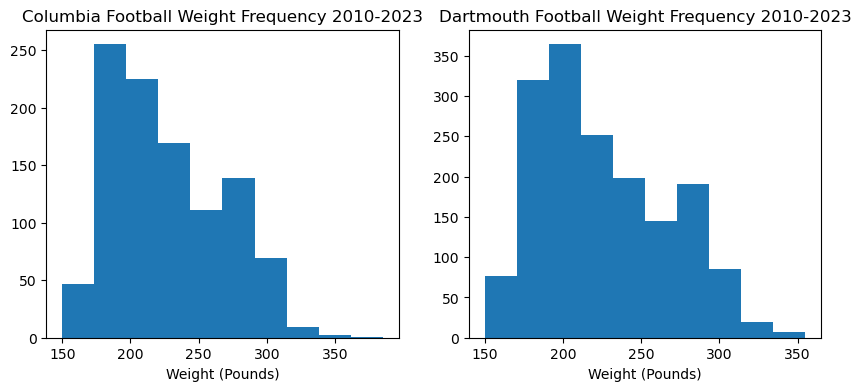

In [273]:
#Columbia and Dartmouth Football Weight 2010-2023
columbia = dc[dc["College"] == "Columbia"]
c_overall_weight = columbia[columbia["Sport"] == "football"]["Weight"]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

axes[0].hist(c_overall_weight)
axes[0].set_xlabel("Weight (Pounds)")
axes[0].set_title("Columbia Football Weight Frequency 2010-2023")

dartmouth = dc[dc["College"] == "Dartmouth"]
d_overall_weight = dartmouth[dartmouth["Sport"] == "football"]["Weight"]

axes[1].hist(d_overall_weight)
axes[1].set_xlabel("Weight (Pounds)")
axes[1].set_title("Dartmouth Football Weight Frequency 2010-2023")

In [286]:
# #Columbia Average weight for various positions? What are the top 5 positions with the highest average weight?
w_p_c = columbia[columbia["Sport"] == "football"][["Weight", "Position"]].dropna()

weight_df = w_p_c.groupby("Position").mean()

wc = weight_df.nlargest(5, "Weight")
wc

,Weight
Position,
OL,290.804598
DL,255.229508
FB,243.500000
LB/DL,240.000000
TE,238.338710


In [285]:
#Dartmouth Average weight for various positions? What are the top 5 positions with the highest average weight?
w_p_d = dartmouth[dartmouth["Sport"] == "football"][["Weight", "Position"]].dropna()

weight_ddf = w_p_d.groupby("Position").mean()
wd = weight_ddf.nlargest(5, "Weight")
wd

,Weight
Position,
OL,285.310219
DT,278.488372
DL,266.800000
DE,249.186047
TE/QB,247.500000


In [287]:
# Of the top 5 highest weight positions, Dartmouth and Columbia have the following positions in common:
pd.merge(wc, wd, on = "Position", how = "inner")


,Weight_x,Weight_y
Position,,
OL,290.804598,285.310219
DL,255.229508,266.800000
